## Preparing Backtest Results for Alphalens

In [ ]:
!pip install alphalens-reloaded

In [1]:
import warnings

In [2]:
import pandas as pd
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [3]:
warnings.filterwarnings("ignore")

Load the mean reversion data

In [4]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

Construct a dataframe with symbols in the columns and dates in the rows for prices

In [5]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

Convert column names to strings

In [6]:
prices.columns = [col.symbol for col in prices.columns]

Normalize Timestamp to midnight, preserving tz information

In [7]:
prices.index = prices.index.normalize()

Construct a dataframe with symbols in the columns and factor rank in the rows

In [8]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

Convert column names to strings

In [9]:
factor_data.columns = [col.symbol for col in factor_data.columns]

Normalize Timestamp to midnight, preserving tz information

In [10]:
factor_data.index = factor_data.index.normalize()

Create a multiindex with date in level 0 and symbol in level 1

In [11]:
factor_data = factor_data.stack()

Rename the multiindexes

In [12]:
factor_data.index.names = ["date", "asset"]

Display factor data

In [13]:
display(factor_data)

date                       asset
2016-01-04 00:00:00+00:00  AAL      1156.0
                           AAPL     2547.0
                           ABBV      438.0
                           AET       893.0
                           AGN      1371.0
                                     ...  
2017-12-29 00:00:00+00:00  ISRG     2449.0
                           DWDP     1277.0
                           ANTM     1510.0
                           PCG      2440.0
                           CBS       292.0
Length: 50275, dtype: float64

Compile the forward returns, factor rank, and factor quantile using Alphalens

In [14]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Display Alphalens data

In [15]:
display(alphalens_data)

5D       10D       21D       63D  \
date                      asset                                           
2016-01-04 00:00:00+00:00 AAL    0.004155 -0.050110 -0.037399  0.041066   
                          AAPL  -0.064737 -0.082487 -0.084670  0.054770   
                          ABBV  -0.064746 -0.045478 -0.055893  0.027773   
                          AET   -0.036061 -0.040454 -0.053908 -0.064800   
                          AGN   -0.026344 -0.050997 -0.080561 -0.097310   
...                                   ...       ...       ...       ...   
2017-09-29 00:00:00+00:00 ADP    0.004595  0.004595  0.004595  0.004595   
                          COL    0.011153  0.024537  0.035920  0.035920   
                          BBY    0.059996  0.089902  0.089902  0.089902   
                          EFX    0.025883  0.068132  0.037301  0.027976   
                          SBAC   0.009967  0.044323  0.044323  0.044323   

                                 factor  factor_quantile  
date                      asset                           
2016-01-04 00:00:00+00:00 AAL    1156.0                3  
                          AAPL   2547.0                5  
                          ABBV    438.0                1  
                          AET     893.0                2  
                          AGN    1371.0                4  
...                                 ...              ...  
2017-09-29 00:00:00+00:00 ADP    1239.0                3  
                          COL    2196.0                4  
                          BBY    2486.0                5  
                          EFX    2501.0                5  
                          SBAC   2390.0                5  

[43995 rows x 6 columns]

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Evaluating the Information Coefficient

In [1]:
import warnings

In [2]:
import alphalens
import pandas as pd
from alphalens.performance import (
    factor_information_coefficient,
    mean_information_coefficient,
)
from alphalens.plotting import plot_ic_ts, plot_information_table
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [3]:
warnings.filterwarnings("ignore")

Load the mean reversion data

In [4]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

Construct a dataframe with symbols in the columns and dates in the rows for prices

In [5]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

Convert column names to strings

In [6]:
prices.columns = [col.symbol for col in prices.columns]

Normalize Timestamp to midnight, preserving tz information

In [7]:
prices.index = prices.index.normalize()

Construct a dataframe with symbols in the columns and factor rank in the rows

In [8]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

Convert column names to strings

In [9]:
factor_data.columns = [col.symbol for col in factor_data.columns]

Normalize Timestamp to midnight, preserving tz information

In [10]:
factor_data.index = factor_data.index.normalize()

Create a multiindex with date in level 0 and symbol in level 1

In [11]:
factor_data = factor_data.stack()

Rename the multiindexes

In [12]:
factor_data.index.names = ["date", "asset"]

Compile the forward returns, factor rank, and factor quantile using Alphalens

In [13]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Generate the information coefficient for each holding period on each date

In [14]:
ic = factor_information_coefficient(alphalens_data)

Display the information coefficient

In [15]:
display(ic)

,5D,10D,21D,63D
date,,,,
2016-01-04 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-05 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-06 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-07 00:00:00+00:00,-0.248066,-0.284107,-0.182742,-0.106800
2016-01-08 00:00:00+00:00,-0.248066,-0.263740,-0.182742,-0.085559
...,...,...,...,...
2017-09-25 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.037130
2017-09-26 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.094793
2017-09-27 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.094793


Plot the information table

In [16]:
plot_information_table(ic)

Information Analysis


,5D,10D,21D,63D
IC Mean,0.023,0.031,0.018,0.014
IC Std.,0.186,0.165,0.155,0.166
Risk-Adjusted IC,0.124,0.186,0.116,0.084
t-stat(IC),2.599,3.894,2.426,1.757
p-value(IC),0.010,0.000,0.016,0.080
IC Skew,0.153,0.104,0.530,0.404
IC Kurtosis,-0.247,-0.554,0.246,-0.221


Plot the mean information coefficient

<Axes: >

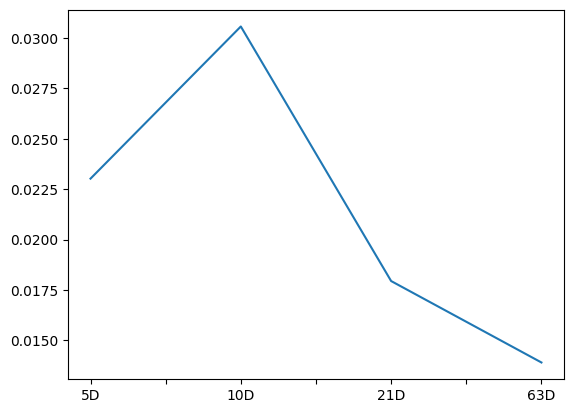

In [17]:
ic_mean = mean_information_coefficient(alphalens_data)
ic_mean.plot()

Plot the IC for the 5-day holding period

array([<Axes: title={'center': '5D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

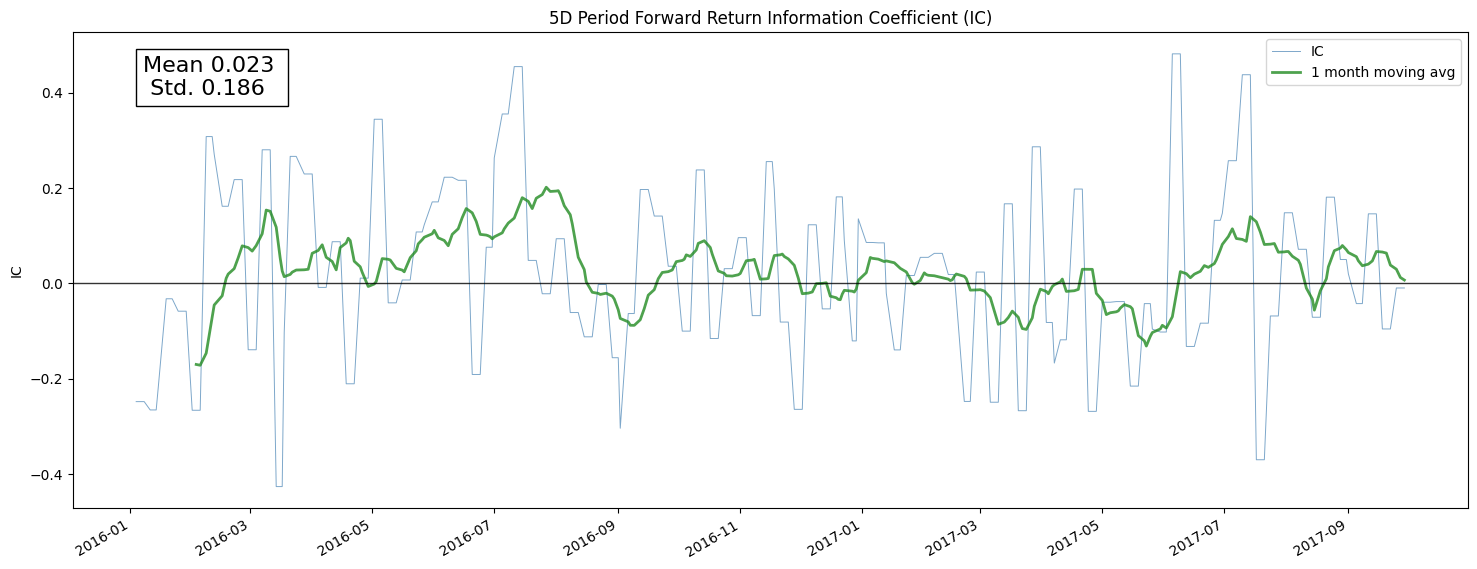

In [18]:
plot_ic_ts(ic[["5D"]])

Plot the IC for the 10-day holding period

array([<Axes: title={'center': '10D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

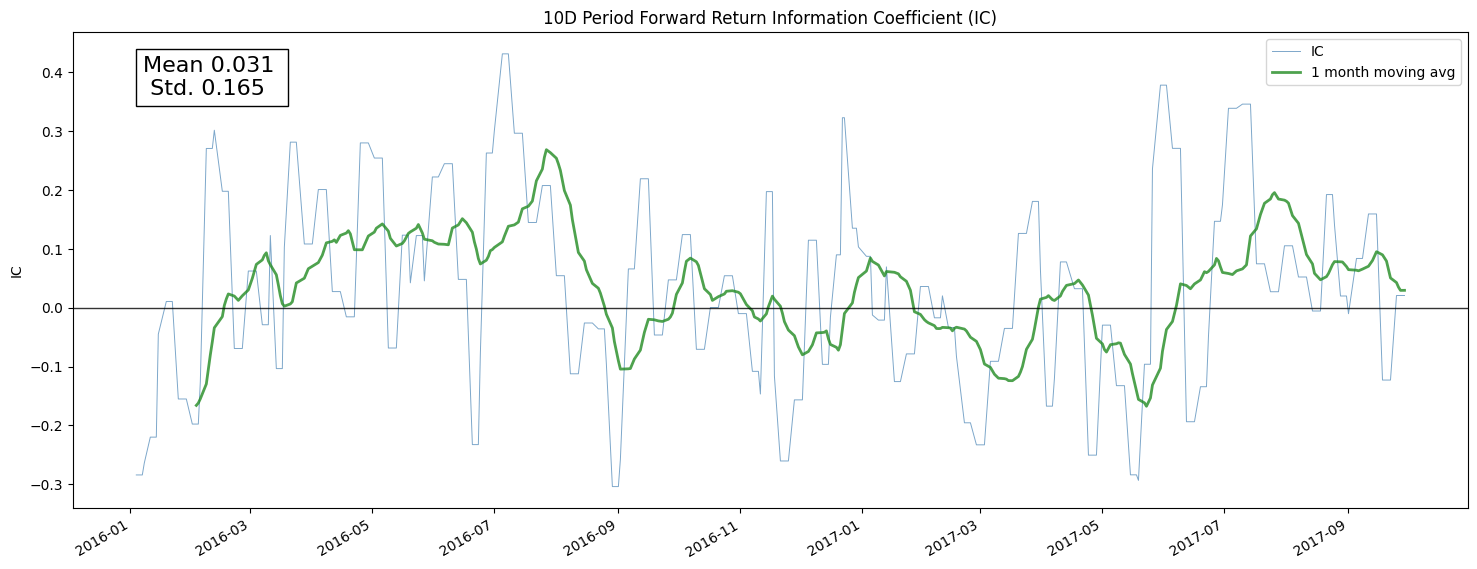

In [19]:
plot_ic_ts(ic[["10D"]])

Calculate and plot the mean IC per holding period per quarter

<Axes: xlabel='date'>

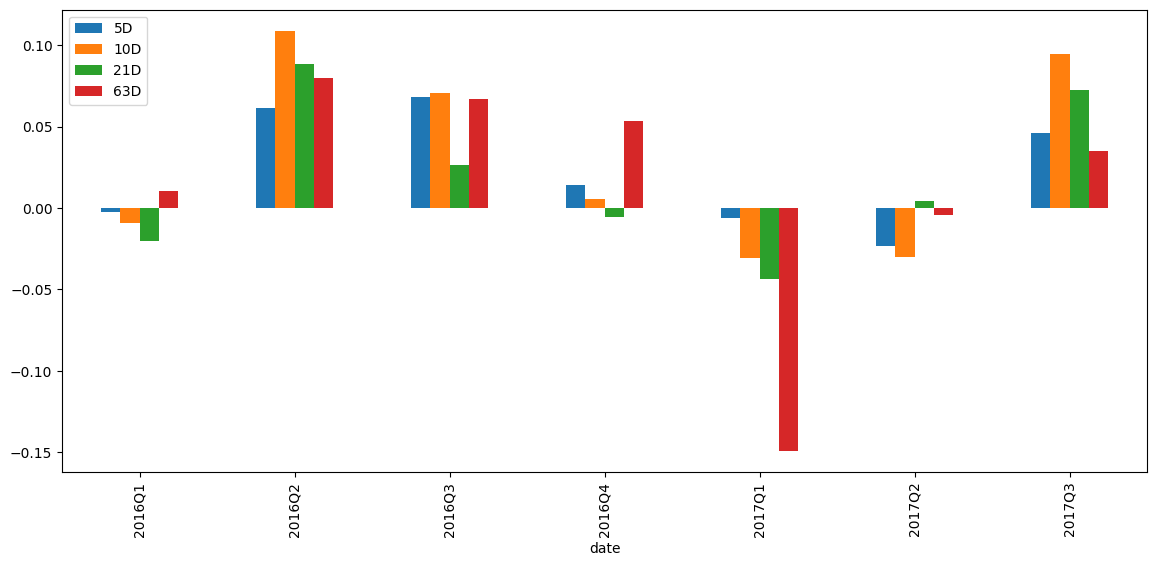

In [20]:
ic_by_quarter = ic.resample("Q").mean()
ic_by_quarter.index = ic_by_quarter.index.to_period("Q")
ic_by_quarter.plot.bar(figsize=(14, 6))

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Examining Factor Return Performance

In [1]:
import warnings

In [2]:
import alphalens
import pandas as pd
from alphalens.performance import (
    compute_mean_returns_spread,
    cumulative_returns,
    factor_alpha_beta,
    factor_cumulative_returns,
    factor_returns,
    mean_return_by_quantile,
)
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [3]:
warnings.filterwarnings("ignore")

Load the mean reversion data

In [4]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

Construct a dataframe with symbols in the columns and dates in the rows for prices

In [5]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

Convert column names to strings

In [6]:
prices.columns = [col.symbol for col in prices.columns]

Normalize Timestamp to midnight, preserving tz information

In [7]:
prices.index = prices.index.normalize()

Construct a dataframe with symbols in the columns and factor rank in the rows

In [8]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

Convert column names to strings

In [9]:
factor_data.columns = [col.symbol for col in factor_data.columns]

Normalize Timestamp to midnight, preserving tz information

In [10]:
factor_data.index = factor_data.index.normalize()

Create a multiindex with date in level 0 and symbol in level 1

In [11]:
factor_data = factor_data.stack()

Rename the multiindexes

In [12]:
factor_data.index.names = ["date", "asset"]

Compile the forward returns, factor rank, and factor quantile using Alphalens

In [13]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Calculate and display factor returns

In [14]:
returns = factor_returns(alphalens_data)
display(returns)

,5D,10D,21D,63D
date,,,,
2016-01-04 00:00:00+00:00,-0.016253,-0.027134,-0.013492,-0.015658
2016-01-05 00:00:00+00:00,-0.016253,-0.027134,-0.013492,-0.015658
2016-01-06 00:00:00+00:00,-0.016253,-0.027134,-0.013492,-0.015658
2016-01-07 00:00:00+00:00,-0.016253,-0.027134,-0.026664,-0.015658
2016-01-08 00:00:00+00:00,-0.016253,-0.026459,-0.026664,-0.011788
...,...,...,...,...
2017-09-25 00:00:00+00:00,-0.003797,-0.001202,0.000069,0.000902
2017-09-26 00:00:00+00:00,-0.003797,-0.001202,0.000069,-0.006470
2017-09-27 00:00:00+00:00,-0.003797,-0.001202,0.000069,-0.006470


Calculate and display factor returns by asset

In [15]:
returns = factor_returns(alphalens_data, by_asset=True)
display(returns)

5D       10D       21D       63D
date                      asset                                        
2016-01-04 00:00:00+00:00 AAL   -0.000006  0.000078  0.000058 -0.000064
                          AAPL  -0.001374 -0.001751 -0.001797  0.001162
                          ABBV   0.000862  0.000605  0.000744 -0.000370
                          AET    0.000211  0.000237  0.000316  0.000380
                          AGN   -0.000052 -0.000100 -0.000158 -0.000191
...                                   ...       ...       ...       ...
2017-09-29 00:00:00+00:00 ADP   -0.000008 -0.000008 -0.000008 -0.000008
                          COL    0.000130  0.000285  0.000417  0.000417
                          BBY    0.000939  0.001407  0.001407  0.001407
                          EFX    0.000411  0.001081  0.000592  0.000444
                          SBAC   0.000143  0.000635  0.000635  0.000635

[43995 rows x 4 columns]

Plot cumulative returns

<Axes: xlabel='date'>

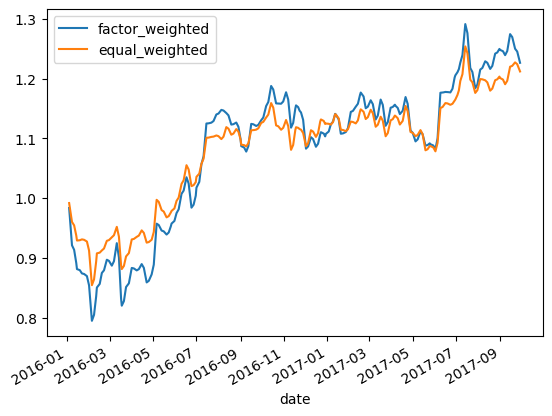

In [16]:
pd.concat(
    {
        "factor_weighted": factor_cumulative_returns(alphalens_data, period="5D"),
        "equal_weighted": factor_cumulative_returns(
            alphalens_data, period="5D", equal_weight=True
        ),
    },
    axis=1,
).plot()

Calculate and display mean return by quantile

,5D,10D,21D,63D
factor_quantile,,,,
1,-0.000195,-0.000131,0.000618,-0.001325
2,-0.000024,-0.001480,-0.002455,-0.002777
3,-0.000637,-0.001633,-0.001494,-0.003197
4,-0.000208,0.000304,-0.000007,0.001897
5,0.001063,0.002940,0.003341,0.005413


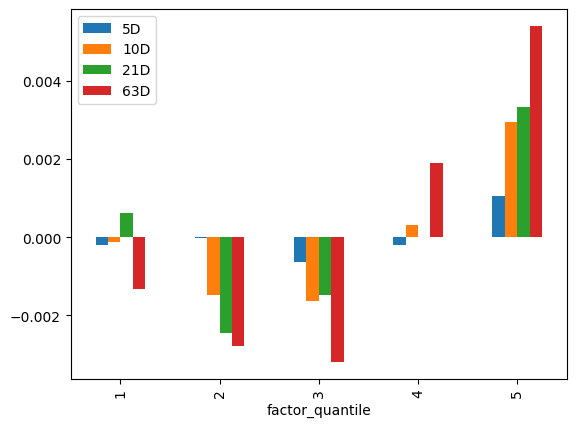

In [17]:
mean_returns, std_err = mean_return_by_quantile(alphalens_data)
mean_returns.plot.bar()
display(mean_returns)

Calculate mean returns by date and display return difference

In [18]:
mean_returns_by_date, _ = mean_return_by_quantile(alphalens_data, by_date=True)

In [19]:
mean_return_difference, _ = compute_mean_returns_spread(
    mean_returns=mean_returns_by_date,
    upper_quant=1,
    lower_quant=5,
)

<Axes: xlabel='date'>

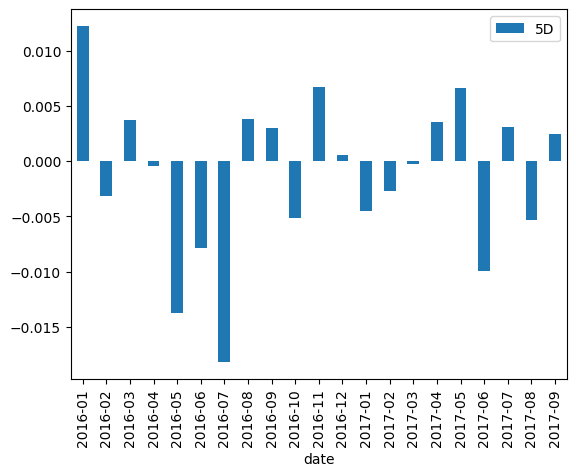

In [20]:
mean_return_difference[["5D"]].resample("M").mean().to_period("M").plot.bar()

Calculate and display alpha and beta

In [21]:
alpha_beta = factor_alpha_beta(alphalens_data)
display(alpha_beta)

,5D,10D,21D,63D
Ann. alpha,0.006204,0.015760,-0.003038,-0.012823
beta,0.136634,0.123627,0.117090,0.147144


**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Evaluating Factor Turnover

In [1]:
import warnings

In [2]:
import alphalens
import pandas as pd
from alphalens.performance import factor_rank_autocorrelation, quantile_turnover
from alphalens.plotting import plot_factor_rank_auto_correlation
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [3]:
warnings.filterwarnings("ignore")

Load the mean reversion data

In [4]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

Construct a dataframe with symbols in the columns and dates in the rows for prices

In [5]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

Convert column names to strings

In [6]:
prices.columns = [col.symbol for col in prices.columns]

Normalize Timestamp to midnight, preserving tz information

In [7]:
prices.index = prices.index.normalize()

Construct a dataframe with symbols in the columns and factor rank in the rows

In [8]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

Convert column names to strings

In [9]:
factor_data.columns = [col.symbol for col in factor_data.columns]

Normalize Timestamp to midnight, preserving tz information

In [10]:
factor_data.index = factor_data.index.normalize()

Create a multiindex with date in level 0 and symbol in level 1

In [11]:
factor_data = factor_data.stack()

Rename the multiindexes

In [12]:
factor_data.index.names = ["date", "asset"]

Compile the forward returns, factor rank, and factor quantile using Alphalens

In [13]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Calculate and display quantile turnover

In [14]:
turnover = quantile_turnover(alphalens_data, quantile=1)
display(turnover)

date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000000
2016-01-06 00:00:00+00:00    0.000000
2016-01-07 00:00:00+00:00    0.000000
2016-01-08 00:00:00+00:00    0.000000
                               ...   
2017-09-25 00:00:00+00:00    0.030303
2017-09-26 00:00:00+00:00    0.000000
2017-09-27 00:00:00+00:00    0.000000
2017-09-28 00:00:00+00:00    0.000000
2017-09-29 00:00:00+00:00    0.000000
Freq: C, Name: 1, Length: 440, dtype: float64

Plot the mean quantile turnover per month

<Axes: xlabel='date'>

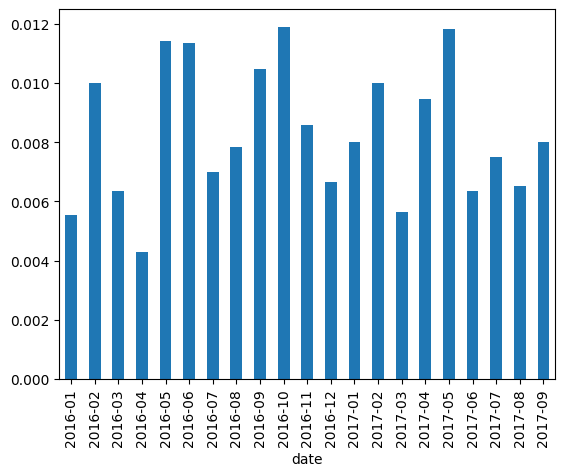

In [15]:
turnover.resample("M").mean().to_period("M").plot.bar()

Calculate and display factor rank autocorrelation

In [16]:
factor_ac = factor_rank_autocorrelation(alphalens_data)
display(factor_ac)

date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    1.000000
2016-01-06 00:00:00+00:00    1.000000
2016-01-07 00:00:00+00:00    1.000000
2016-01-08 00:00:00+00:00    1.000000
                               ...   
2017-09-25 00:00:00+00:00    0.787847
2017-09-26 00:00:00+00:00    1.000000
2017-09-27 00:00:00+00:00    1.000000
2017-09-28 00:00:00+00:00    1.000000
2017-09-29 00:00:00+00:00    1.000000
Freq: C, Name: 1, Length: 440, dtype: float64

Plot the factor rank autocorrelation

<Axes: title={'center': '1D Period Factor Rank Autocorrelation'}, ylabel='Autocorrelation Coefficient'>

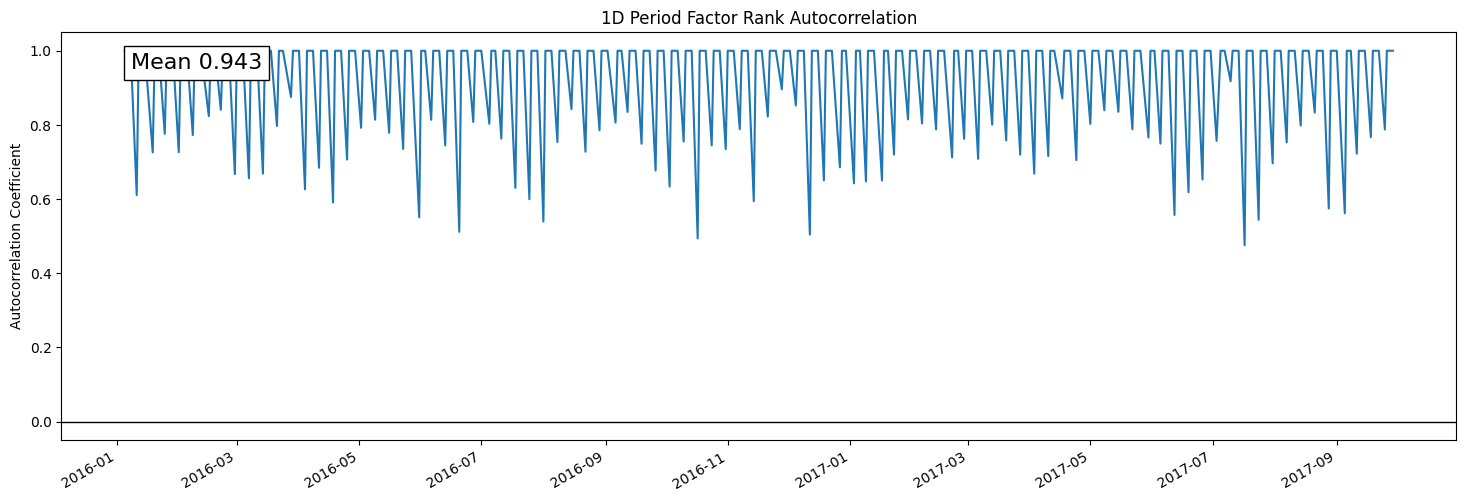

In [17]:
plot_factor_rank_auto_correlation(factor_ac)

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.